In [41]:
graphics_toolkit('qt')

In [42]:
addpath('../libs/');

# Anomaly detection with Gaussian distribution

In [43]:
load('../../data/ex8data1.mat');
whos;

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name          Size                     Bytes  Class
  ====   ====          ====                     =====  ===== 
         F1            1x1                          8  double
         X           307x2                       4912  double
         Xval        307x2                       4912  double
         ans           1x1                          8  double
         epsilon       1x1                          8  double
         fn            1x1                          8  double
         fp            1x1                          8  double
         mu           11x1                         88  double
         outliers      6x1                         48  double
         p          1000x1                       8000  double
         prec          1x1                          8  double
         pred        307x1                        307  logical
         pval        100x1                        800  dou

## Plot feature histrogram

the distribution shuld all look like Gaussian distribution.

If there are features doesn't look like Gaussian distribution, we should try multiple transformation to the feature to make it look like one.

possible transformation functions are
- $x \gets \log(x + \text{constant})$
- $x \gets \sqrt[k]{x}$

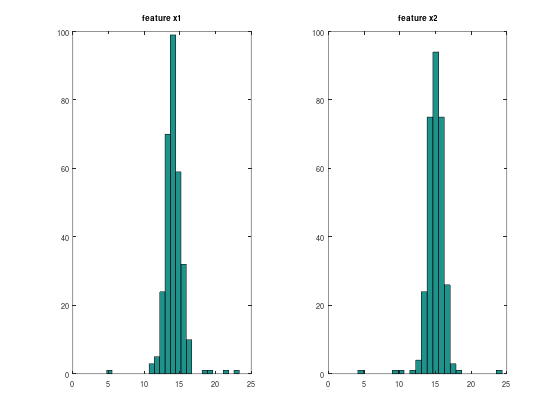

In [44]:
plotFeatureHist(X);

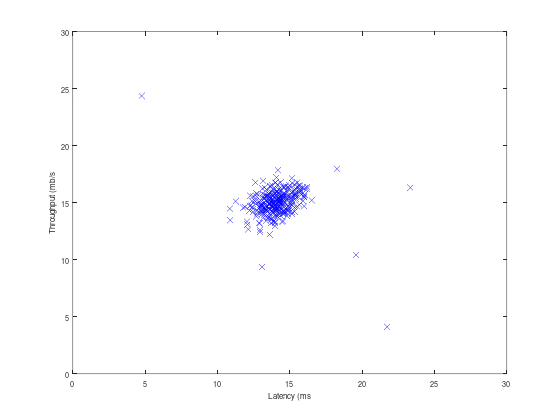

In [45]:
plot(X(:, 1), X(:, 2), 'bx');
axis([0 30 0 30]);
xlabel('Latency (ms');
ylabel('Throughput (mb/s');

In [46]:
[mu, sigma2] = estimateGaussian(X);

In [47]:
p = estimateGaussianDensity(X, mu, sigma2);

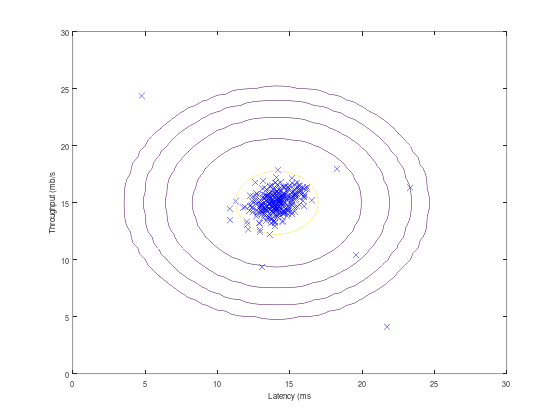

In [48]:
visualizeFit(X, mu, sigma2)
axis([0 30 0 30]);
xlabel('Latency (ms');
ylabel('Throughput (mb/s');

In [49]:
pval = estimateGaussianDensity(Xval, mu, sigma2);
[epsilon, F1] = selectThreshold(yval, pval);
fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('# Outliers found: %d\n', sum(p < epsilon));
fprintf('   (you should see a value epsilon of about 8.99e-05)\n\n');

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set:  0.875000
# Outliers found: 6
   (you should see a value epsilon of about 8.99e-05)



In [50]:
outliers = find(p < epsilon);

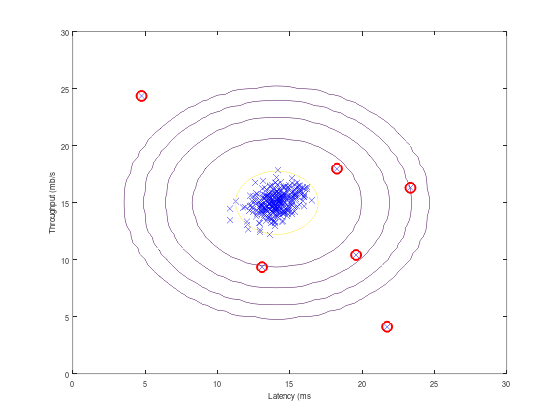

In [51]:
visualizeFit(X, mu, sigma2, @estimateGaussianDensity)
axis([0 30 0 30]);
xlabel('Latency (ms');
ylabel('Throughput (mb/s');
hold on
plot(X(outliers, 1), X(outliers, 2), 'ro', 'LineWidth', 2, 'MarkerSize', 10);
hold off

## Multi-dimensional outliers

with multivariate Gaussian distribution

In [53]:
load('../../data/ex8data2.mat');
whos;

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name          Size                     Bytes  Class
  ====   ====          ====                     =====  ===== 
         F1            1x1                          8  double
         X          1000x11                     88000  double
         Xval        100x11                      8800  double
         ans           1x1                          8  double
         epsilon       1x1                          8  double
         fn            1x1                          8  double
         fp            1x1                          8  double
         mu            2x1                         16  double
         outliers      6x1                         48  double
         p           307x1                       2456  double
         prec          1x1                          8  double
         pred        307x1                        307  logical
         pval        307x1                       2456  dou

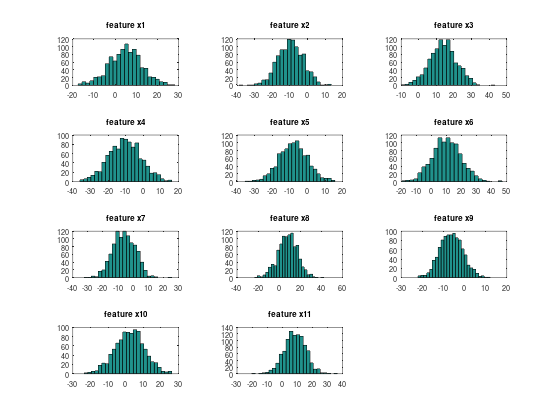

In [54]:
plotFeatureHist(X);

In [55]:
[mu sigma2] = estimateGaussian(X);

In [56]:
p = multivariateGaussian(X, mu, sigma2);

In [57]:
pval = multivariateGaussian(Xval, mu, sigma2);

In [58]:
[epsilon F1] = selectThreshold(yval, pval);
fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('# Outliers found: %d\n', sum(p < epsilon));
fprintf('   (you should see a value epsilon of about 1.38e-18)\n\n');

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Outliers found: 117
   (you should see a value epsilon of about 1.38e-18)

